# Cars24 is one of the leading used-car buying and selling platform in India.

### **1.1 Imports**


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

### **1.2 Load Dataset**

In [28]:
input_file = "./Workspace/PythonWorkspace/Python-Machine-Learning-Analysis/Analysis/data/cars24-car-price-cleaned.csv"
#input_file = ""./data/cars24-car-price-cleaned.csv"

In [29]:
df = pd.read_csv(input_file)
df

,selling_price,year,km_driven,mileage,engine,max_power,age,make,model,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5
0,1.20,2012.0,120000,19.70,796.0,46.30,11.0,MARUTI,ALTO STD,1,0,0,0,0,1,1,1,0
1,5.50,2016.0,20000,18.90,1197.0,82.00,7.0,HYUNDAI,GRAND I10 ASTA,1,0,0,0,0,1,1,1,0
2,2.15,2010.0,60000,17.00,1197.0,80.00,13.0,HYUNDAI,I20 ASTA,1,0,0,0,0,1,1,1,0
3,2.26,2012.0,37000,20.92,998.0,67.10,11.0,MARUTI,ALTO K10 2010-2014 VXI,1,0,0,0,0,1,1,1,0
4,5.70,2015.0,30000,22.77,1498.0,98.59,8.0,FORD,ECOSPORT 2015-2021 1.5 TDCI TITANIUM BSIV,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,6.50,2017.0,69480,23.59,1364.0,67.05,6.0,TOYOTA,PLATINUM ETIOS 1.4 GXD,0,0,1,0,0,0,1,1,0
19816,9.25,2019.0,18000,17.50,1373.0,91.10,4.0,MARUTI,ERTIGA BSIV VXI,0,0,0,0,0,1,1,0,1
19817,4.25,2015.0,67000,21.14,1498.0,103.52,8.0,SKODA,RAPID 1.5 TDI ELEGANCE,0,0,1,0,0,0,1,1,0
19818,12.25,2016.0,3800000,16.00,2179.0,140.00,7.0,MAHINDRA,XUV500 W6 2WD,0,0,1,0,0,0,1,0,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

Make and Model are not numerical features and we need to convert them to numerical values. How ?

OneHot encoding / Label Encoding / Target Encoding

In [ ]:
df['make'].nunique()

41

In [8]:
df['model'].nunique()

3233

OneHot Encoding increases the dimensionality - Make - 41 and Model - 3233

In [31]:
df['make_te'] = df.groupby("make")["selling_price"].transform("mean")
df['model_te'] = df.groupby("model")["selling_price"].transform("mean")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19820 entries, 0 to 19819
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   selling_price     19820 non-null  float64
 1   year              19820 non-null  float64
 2   km_driven         19820 non-null  int64  
 3   mileage           19820 non-null  float64
 4   engine            19820 non-null  float64
 5   max_power         19820 non-null  float64
 6   age               19820 non-null  float64
 7   make              19820 non-null  object 
 8   model             19820 non-null  object 
 9   Individual        19820 non-null  int64  
 10  Trustmark Dealer  19820 non-null  int64  
 11  Diesel            19820 non-null  int64  
 12  Electric          19820 non-null  int64  
 13  LPG               19820 non-null  int64  
 14  Petrol            19820 non-null  int64  
 15  Manual            19820 non-null  int64  
 16  5                 19820 non-null  int64 

**Normalizing the data**

In [36]:
df.select_dtypes("object").columns

Index(['make', 'model'], dtype='object')

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns = df.select_dtypes("object").columns)), columns = df.columns.drop(df.select_dtypes("object").columns))
df_scaled

,selling_price,year,km_driven,mileage,engine,max_power,age,Individual,Trustmark Dealer,Diesel,Electric,LPG,Petrol,Manual,5,>5,make_te,model_te
0,0.043684,0.689655,0.031553,0.135345,0.117891,0.066506,0.310345,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.194048,0.041550
1,0.252397,0.827586,0.005237,0.128448,0.177281,0.123994,0.172414,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.232517,0.218382
2,0.089795,0.620690,0.015764,0.112069,0.177281,0.120773,0.379310,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.232517,0.149143
3,0.095134,0.689655,0.009711,0.145862,0.147808,0.100000,0.310345,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.194048,0.093193
4,0.262104,0.793103,0.007869,0.161810,0.221860,0.150709,0.206897,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.252367,0.313574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19815,0.300934,0.862069,0.018258,0.168879,0.202014,0.099919,0.137931,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.484670,0.328028
19816,0.434413,0.931034,0.004711,0.116379,0.203347,0.138647,0.068966,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.194048,0.330632
19817,0.191724,0.793103,0.017606,0.147759,0.221860,0.158647,0.206897,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.318156,0.200656
19818,0.580027,0.827586,1.000000,0.103448,0.322719,0.217391,0.172414,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.324782,0.377671


**Train Test Split**

In [40]:
from sklearn.model_selection import train_test_split
y = df_scaled["selling_price"]
X = df_scaled.drop(columns= "selling_price")
y.shape, x.shape

((19820,), (19820, 17))

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)
X_test.shape, X_train.shape, y_test.shape, y_train.shape

((5946, 17), (13874, 17), (5946,), (13874,))

**Training the Model**

**Single variable**

In [43]:
X1 = X[['model_te']]
X1_train = X_train[['model_te']]
X1_test = X_test[['model_te']]

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X1_train, y_train)
print(model.coef_)
print(model.intercept_)

[0.9967642]
0.0015237505846132926


In [45]:
model.predict(X1)

array([0.04293954, 0.21919884, 0.15018463, ..., 0.20153052, 0.37797252,
       0.51930761])

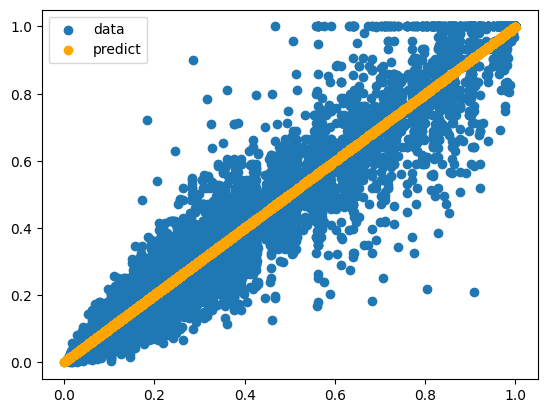

In [46]:
y_hat = model.predict(X1)
fig = plt.figure()
plt.scatter(X1,y,label = 'data')
plt.scatter(X1,y_hat,color = 'orange', label = 'predict')
plt.legend()
plt.show()

**For All variables**